Euler method:

$$
    y_{n+1} = y_n + hf(t_n, y_n)
$$

In [2]:
import numpy as np
#Euler method
fringes = [0, 100]
N = 1000
h = (fringes[1] - fringes[0])/N
t_cur = fringes[0]
y_s = []
x_s = []
f = np.cos
y = f(t_cur)
x_s.append(t_cur)
y = f(t_cur)
y_s.append(y)
t_cur = t_cur+h
while t_cur < fringes[1]:
    t_cur = t_cur+h
    x_s.append(t_cur)
    y = y + h*f(t_cur)
    y_s.append(y)

Runge-Kutta's method:

$$
    y_{n+1} = y_n + 1/6(k_1 + k_2 + k_3 + k_4)
$$

$$
    k_1 = hf(t_n,y_n)
$$

$$
    k_2 = hf(t_n + h/2, y_n + k_1/2)
$$

$$
    k_3 = hf(t_n + h/2, y_n + k_2/2)
$$

$$
    k_4 = hf(t_n + h, y_n + k_3)
$$


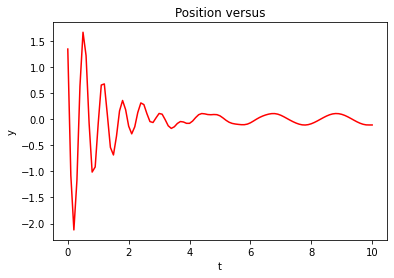

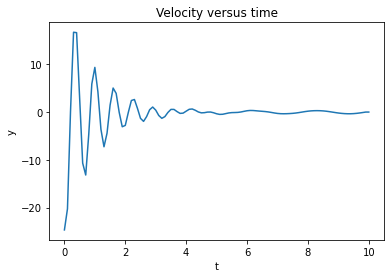

In [15]:
import numpy as np
def rk4Algor (t , h , N, y , f ) :
    k1=np.zeros(N); 
    k2=np.zeros(N)
    k3=np.zeros(N)
    k4=np.zeros(N)
    k1 = h*f(t,y)
    k2 = h*f(t+h/2.,y+k1/2.)
    k3 = h*f(t+h/2.,y+k2 /2.)
    k4 = h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y

from numpy import *
import numpy as np , matplotlib.pyplot as plt
Tstart = 0.
Tend = 10.
Nsteps = 100 # Initialization
tt =[]
yy =[]
yv =[]
y = zeros ((2),float)
y[0] = 3. 
y[1] = -5. # I n i t i a l position & velocity
t = Tstart
h = (Tend-Tstart )/Nsteps
def f (t , y) : # Force (RHS) function
    fvector = zeros ((2) , float )
    fvector [ 0 ] = y [ 1 ]
    fvector [ 1 ] = -100.*y[0] -2.*y [ 1 ] + 10.* sin (3.* t )
    return fvector
while ( t < Tend) :
    tt.append( t ) # Time loop
    if(( t + h) > Tend):
        h = Tend - t # Last step
    y = rk4Algor(t , h , 2 , y , f )
    yy.append(y [ 0 ] )
    yv.append(y [ 1 ] )
    t = t + h
fig = plt.figure ()
plt.subplot (111)
plt.plot (tt,yy,'r')
plt.title('Position versus')
plt.xlabel('t')
plt.ylabel('y')
fig1=plt.figure()
plt.subplot(111)
plt.plot ( tt , yv)
plt.title( 'Velocity versus time')
plt.xlabel ('t')
plt.ylabel ('y')
plt.show()

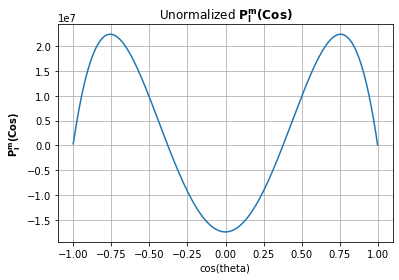

In [25]:
Listing 6.7. Plm.py solves an ODE to determine the associated Legendre Polynomials
Pm
` (x). The Matplotlib package is used for the graphics, and rk4 for the ODE solution.

import numpy as np
def rk4Algor (t , h , N, y , f ) :
    k1=np.zeros(N); 
    k2=np.zeros(N)
    k3=np.zeros(N)
    k4=np.zeros(N)
    k1 = h*f(t,y)
    k2 = h*f(t+h/2.,y+k1/2.)
    k3 = h*f(t+h/2.,y+k2 /2.)
    k4 = h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y

import matplotlib.pylab as plt

CosTheta = np.zeros((1999),float)
Plm = np.zeros((1999),float)
y = np.zeros((2))
dCos = 0.001
el = 4
m = 2 #m intgerm<=el , m = 1 , 2 , 3 , . . .

if el == 0 or el == 2: 
    y[0] = 1
if (el > 2 and (el) %2 == 0):
    if m == 0 : 
        y[0] = -1
    elif (m>0): 
        y[0] = 1
    elif m<0 and np.abs(m)%2 == 0 : 
        y[0] = 1
    elif m<0 and np.abs(m)%2 == 1 : 
        y[0] = -1
        
if (el>2 and el%2 == 1):
    if m == 0: 
        y[0] = 1
    elif m>0: 
        y[0] = -1
    elif m<0: 
        y[0] = 1
y[1] = 1
def f(Cos, y): # RHS of equat ion
    rhs = np.zeros((2)) # Declare array dimension
    rhs[0] = y[1]
    rhs[1] = 2*Cos*y[1]/(1-Cos**2)-(el*(el+1)-m**2/(1-Cos**2))*y[0]/(1-Cos ** 2)
    return rhs
f(0,y) # Cal l funct ion for x i = 0 with init conds .
i = -1
for Cos in np.arange(-0.999999,1-dCos,dCos):
    i = i+1
    CosTheta[i] = Cos
    y = rk4Algor(Cos,dCos,2,y,f) #call runge kutt
    Plm[i] = y[0] #
plt.figure()
plt.plot(CosTheta,Plm)
plt.grid()
plt.title('Unormalized $\mathbf{P_l^m(Cos)}$')
plt.xlabel('cos(theta)')
plt.ylabel('$\mathbf{P_l^m(Cos)}$')
plt.show()

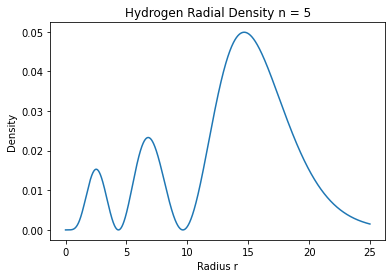

In [24]:
"""
Listing 6.8. Hdensity.py solves the Schrödinger equation numerically for hydrogen using the
rk4 algorithm, and then computes the radial density from the wave function. The Matplotlib
package is used for the graphics.
"""

import numpy as np
def rk4Algor (t , h , N, y , f ) :
    k1=np.zeros(N); 
    k2=np.zeros(N)
    k3=np.zeros(N)
    k4=np.zeros(N)
    k1 = h*f(t,y)
    k2 = h*f(t+h/2.,y+k1/2.)
    k3 = h*f(t+h/2.,y+k2 /2.)
    k4 = h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y

import numpy as np
import matplotlib.pylab as plt
n = 5 ; 
el = 2 ; 
dr = 0.01 # n = npr+e l+1
rVec = np.zeros((2500),float) # array for p l o t
RhoVec = np.zeros((2500),float) # Density array
fvector = np.zeros((2))
y = np.zeros((2))
y[0] = 1e-8; 
y[1] = 0

def f(r,y): # RHS of ODE
    fvector[0] = y[1]
    fvector[1] = -(2/r-1)*y[1]-((n-1)/r-el*(el+1)/ r**2)*y[0]
    return fvector

f(0.001,y) # f ( t= 0)
i = 0
for r in np.arange(0.001,25,dr):
    rVec[i] = r
    y = rk4Algor(r,dr,2,y,f) #call rk4 algorithm
    RhoVec[i] = 4*3.141593*(y[0]*np.exp(-0.5*r))**2* r**2
    i=i+1
plt.figure()
plt.plot(rVec,RhoVec)
plt.title('Hydrogen Radial Density n = 5')
plt.xlabel('Radius r')
plt.ylabel('Density')
plt.show()